# Sundial Deneme

* Python 3.10 
* transformers == 4.40.1 

Bu package'lar lazım. 

## 1. Gerekli Library'lerin Import Edilmesi

In [2]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM

/Users/tugan_basaran/Desktop/Desktop/Lessons/CS.401/Kodlar/Sundial/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Model ve Dataset'in Yüklenmesi 

In [16]:
model = AutoModelForCausalLM.from_pretrained('thuml/sundial-base-128m', trust_remote_code= True)
model.to("cpu")
print("Model device set to: ", model.device)


/Users/tugan_basaran/Desktop/Desktop/Lessons/CS.401/Kodlar/Sundial/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model device set to:  cpu


In [42]:
csv_path = "dataset/commodity_prices.csv"
df= pd.read_csv(csv_path)
df.tail()

,date,BZ=F,CL=F,GC=F,HG=F,HO=F,NG=F,PA=F,PL=F,SI=F,ZC=F
3768,2024-12-24,73.580002,70.099998,2620.000000,4.0495,2.2215,3.946,938.299988,958.500000,29.974001,448.50
3769,2024-12-26,73.260002,69.620003,2638.800049,4.0720,2.2053,3.715,906.400024,952.200012,30.047001,453.75
3770,2024-12-27,74.169998,70.599998,2617.199951,4.0625,2.2448,3.514,893.599976,917.500000,29.655001,454.00
3771,2024-12-30,74.389999,70.989998,2606.100098,4.0455,2.2995,3.936,894.200012,902.400024,29.106001,452.25
3772,2024-12-31,74.639999,71.720001,2629.199951,3.9860,2.3206,3.633,902.900024,894.000000,28.940001,458.50


In [46]:
# train - test split -> 80-20 şeklinde yapacağım 
train_count = int(df.__len__() / 100 * 80)
test_count = df.__len__() - train_count
train_border = [0, train_count]
test_border = [train_count + 1, df.__len__() - 1]
train_border, test_border
train_df = df.iloc[train_border[0] : train_border[1]]
test_df = df.iloc[test_border[0] : test_border[1]]

In [ ]:
train_df.tail()

,date,BZ=F,CL=F,GC=F,HG=F,HO=F,NG=F,PA=F,PL=F,SI=F,ZC=F
3013,2021-12-23,76.849998,73.790001,1811.199951,4.3870,2.3314,3.731,1954.699951,974.599976,22.931,605.75
3014,2021-12-27,78.599998,75.570000,1808.099976,4.4650,2.3535,4.060,1944.300049,968.900024,22.979,614.75
3015,2021-12-28,78.940002,75.980003,1810.199951,4.4200,2.3714,4.055,1998.400024,979.099976,23.111,604.75
3016,2021-12-29,79.230003,76.559998,1805.099976,4.4020,2.3778,4.024,1984.800049,968.200012,22.848,605.50
3017,2021-12-30,79.320000,76.989998,1812.699951,4.3845,2.3959,3.561,1979.199951,963.599976,23.028,596.00


In [48]:
test_df.head()

,date,BZ=F,CL=F,GC=F,HG=F,HO=F,NG=F,PA=F,PL=F,SI=F,ZC=F
3019,2022-01-03,78.980003,76.080002,1799.400024,4.4145,2.3574,3.815,1822.000000,953.700012,22.790001,589.25
3020,2022-01-04,80.000000,76.989998,1814.000000,4.4660,2.4095,3.717,1855.699951,970.400024,23.038000,609.50
3021,2022-01-05,80.800003,77.849998,1824.599976,4.4045,2.4461,3.882,1898.599976,1001.900024,23.150000,602.25
3022,2022-01-06,81.989998,79.459999,1788.699951,4.3480,2.4777,3.812,1869.900024,960.599976,22.174000,603.75
3023,2022-01-07,81.750000,78.900002,1797.000000,4.4030,2.4818,3.916,1917.599976,957.000000,22.393999,606.75


## 3. Input'u Hazırla

* train_df: Lookback için kullanılacak 
* test_df: kalan günlük kısmı kontrol etmek için kullanılacak 

In [ ]:
target = "BZ=F"

In [ ]:
lookback_length = 1024
lookback = torch.tensor(df[target][:lookback_length]).unsqueeze(0).float()
lookback

tensor([[ 80.1200,  80.5900,  81.8900,  ..., 107.8800, 106.6900, 107.4100]])

## 4. Forecasting Configurations

* forecast_length = 288 -> Sonraki 288 günün tahmini
* num_samples = 20 -> Sonraki 288 günü 20 kez tahmin ediyor ve her birinden farklı bir sonuç çıkıyor. 

In [22]:
forecast_length = 288 # Forecast the next 288 timestamps
num_samples = 20 # Generate 20 samples 

In [23]:
forecast = model.generate(lookback, max_new_tokens= forecast_length, num_samples= num_samples)

In [ ]:
forecast.shape 

torch.Size([1, 20, 288])

## 5. Tahminlerin Görselleştirilmiş Hali

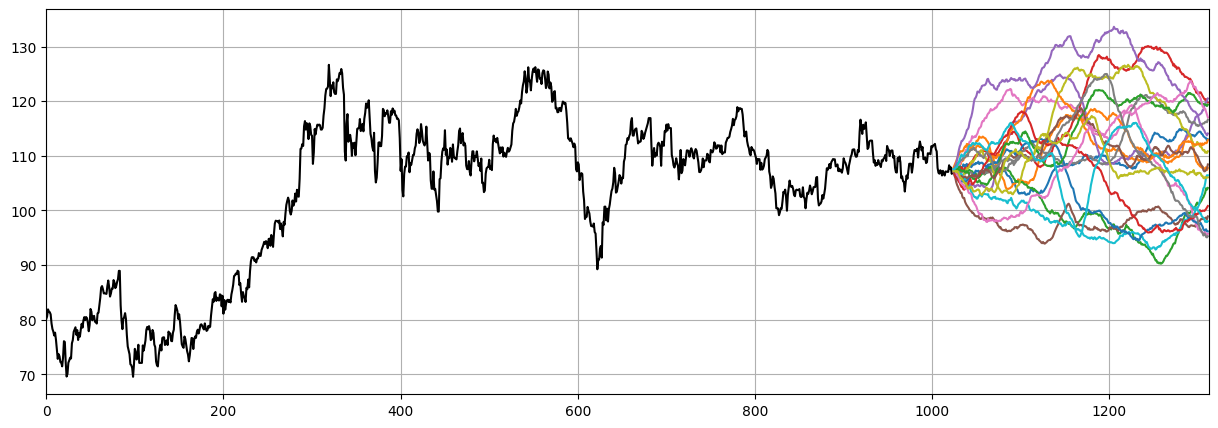

In [24]:
plt.figure(figsize=(15, 5))
plt.xlim(0, lookback_length + forecast_length)
plt.plot(np.arange(lookback_length), lookback[0], color='black')
plt.plot(np.arange(lookback_length, lookback_length + forecast_length), forecast[0].transpose(1, 0))
plt.grid()
plt.show()

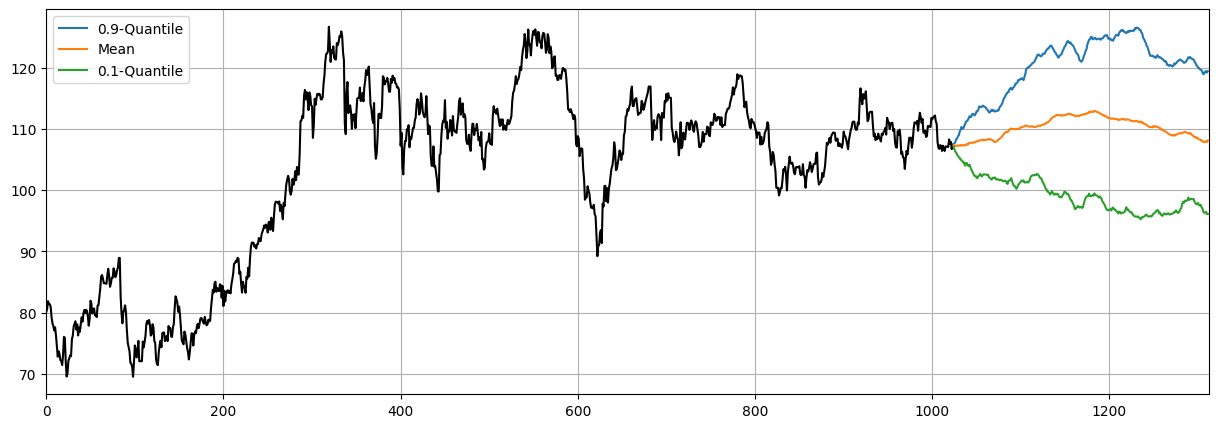

In [25]:
# visualize statistics of the predictions (mean, 0.1-quantile, 0.9-quantile)

plt.figure(figsize=(15, 5))
plt.xlim(0, lookback_length + forecast_length)
plt.plot(np.arange(lookback_length), lookback[0], color='black')
plt.plot(np.arange(lookback_length, lookback_length + forecast_length), forecast[0].quantile(q=0.9, dim=0), label='0.9-Quantile')
plt.plot(np.arange(lookback_length, lookback_length + forecast_length), forecast[0].mean(dim=0), label='Mean')
plt.plot(np.arange(lookback_length, lookback_length + forecast_length), forecast[0].quantile(q=0.1, dim=0), label='0.1-Quantile')
plt.legend()
plt.grid()
plt.show()

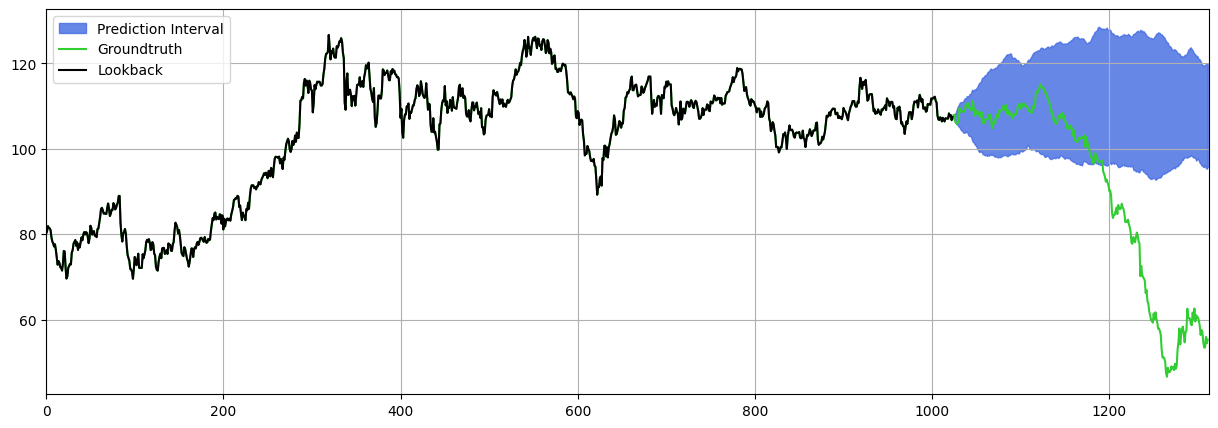

In [27]:
# plot the confidence interval of the predictions

plt.figure(figsize=(15, 5))
plt.xlim(0, lookback_length + forecast_length)
plt.fill_between(np.arange(lookback_length, lookback_length + forecast_length), forecast[0].quantile(q=0.05, dim=0), forecast[0].quantile(q=0.95, dim=0), alpha=0.8, color="royalblue", label='Prediction Interval')
plt.plot(df["BZ=F"][:lookback_length + forecast_length], color="limegreen", label="Groundtruth")
plt.plot(df["BZ=F"][:lookback_length], color="black", label="Lookback")
plt.legend()
plt.grid()
plt.show()


## 6. Evaluation Metrics - Daha bitmedi, yapılması lazım. 

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error

In [ ]:
for i in range(num_samples): 
    preds = forecast[0, i, :]
    


tensor([107.0803, 106.7112, 106.6902, 107.1140, 107.4513, 107.4552, 107.8003,
        108.2174, 107.9171, 107.8596, 107.8520, 108.4261, 108.2704, 107.9400,
        108.3438, 108.5108, 107.9451, 108.1450, 108.3145, 108.1700, 107.9192,
        108.1702, 108.3338, 108.4633, 108.4110, 108.6824, 108.5718, 108.7328,
        108.9270, 108.4907, 108.6882, 108.7192, 108.7522, 108.6306, 108.3847,
        108.1919, 108.1254, 108.0134, 108.0805, 107.9138, 107.7156, 108.0290,
        107.8814, 107.9655, 108.0568, 107.8603, 107.2954, 107.5172, 107.6141,
        107.7365, 107.6644, 107.9828, 107.5685, 107.3566, 107.1643, 107.3412,
        107.1656, 107.3376, 107.2355, 106.9643, 106.6062, 106.3658, 106.3055,
        106.2562, 105.9236, 105.7514, 105.2426, 104.8838, 104.9055, 104.9617,
        104.3493, 103.9287, 103.8111, 103.3113, 103.0687, 103.1633, 103.1095,
        103.2542, 103.1356, 103.1947, 103.3359, 102.9590, 102.8547, 102.9068,
        103.0745, 102.9704, 103.2327, 103.8080, 103.7659, 103.69